In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv("voice.csv")

In [38]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [39]:
df.shape

(3168, 21)

In [40]:
print(df.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [41]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [43]:
# df.corr()['label']

In [44]:
gender=df.label.value_counts()
print(gender)
print("total= ",df.label.count())

male      1584
female    1584
Name: label, dtype: int64
total=  3168


In [45]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [46]:
df.label= [ 1 if g == "female" else 0 for g in df.label]

In [47]:
df.label

0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164    1
3165    1
3166    1
3167    1
Name: label, Length: 3168, dtype: int64

In [48]:
y= df.label.values
X= df.drop(['label'], axis='columns')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.2, random_state=50)
algo_names=[]
algo_scores=[]

In [49]:
X_train.shape

(2534, 20)

In [50]:
X_test.shape

(634, 20)

In [51]:
X_train.shape

(2534, 20)

In [52]:
X_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
974,0.188291,0.060757,0.196792,0.128553,0.243459,0.114906,1.924342,6.921315,0.898536,0.359334,0.117107,0.188291,0.130205,0.048096,0.274286,1.341518,0.023438,5.414062,5.390625,0.112298
2769,0.187396,0.044700,0.185598,0.171349,0.206260,0.034911,2.454544,9.671798,0.878222,0.354332,0.174198,0.187396,0.155880,0.048534,0.277457,1.388672,0.023438,6.609375,6.585938,0.109103
1805,0.177266,0.033878,0.175619,0.166018,0.188938,0.022920,3.261121,14.297520,0.816742,0.226999,0.164469,0.177266,0.164342,0.020833,0.250000,0.596128,0.078125,6.203125,6.125000,0.146104
175,0.134962,0.062047,0.111388,0.088780,0.189571,0.100791,2.317095,9.072179,0.931091,0.560896,0.104794,0.134962,0.086565,0.016277,0.275862,0.329346,0.007812,4.265625,4.257812,0.132783
1919,0.097562,0.070847,0.071001,0.038766,0.158224,0.119458,1.430850,4.652448,0.952220,0.664712,0.038555,0.097562,0.148914,0.019851,0.222222,0.255774,0.007812,0.640625,0.632812,0.305836


In [53]:
X_train.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2014,0.142297,0.083138,0.169747,0.058402,0.217596,0.159194,1.963700,7.248161,0.955880,0.700716,0.229604,0.142297,0.178167,0.017877,0.238806,0.308190,0.007812,0.781250,0.773438,0.387335
2157,0.183551,0.033172,0.187811,0.178004,0.196637,0.018634,3.361455,14.422563,0.785318,0.235786,0.192715,0.183551,0.177953,0.060377,0.246154,0.622596,0.179688,5.765625,5.585938,0.167133
1931,0.162205,0.069786,0.182035,0.136821,0.210530,0.073709,4.105541,35.655663,0.930920,0.575286,0.000000,0.162205,0.149335,0.027257,0.225352,0.663462,0.007812,6.960938,6.953125,0.187743
1504,0.117170,0.076995,0.108125,0.050000,0.201406,0.151406,10.649260,228.008040,0.944999,0.653185,0.000000,0.117170,0.111191,0.015640,0.258065,0.081182,0.007812,1.343750,1.335938,0.094542
1712,0.240844,0.053585,0.256984,0.236169,0.268792,0.032623,3.203079,14.252101,0.824963,0.201548,0.268392,0.240844,0.225755,0.062745,0.275862,0.638849,0.007812,4.078125,4.070312,0.156384


In [54]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
d= DecisionTreeClassifier(random_state=50)
d.fit(X_train,y_train)
print("Decision Tree Score: ",d.score(X_test,y_test))
algo_names.append("DecisionTree")
algo_scores.append(d.score(X_test, y_test))
d1=d.predict(X_test)
report_DecisionTree = classification_report(y_test,d1)
print(report_DecisionTree)

Decision Tree Score:  0.9511041009463722
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       310
           1       0.95      0.95      0.95       324

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



In [55]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
r=RandomForestClassifier(random_state=50)
r.fit(X_train, y_train)
print("Random Forest Score: ",r.score(X_test, y_test))
algo_names.append("RandomForest")
algo_scores.append(r.score(X_test,y_test))
r1=r.predict(X_test)
report_randomforest = classification_report(y_test,r1)
print(report_randomforest)

Random Forest Score:  0.973186119873817
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       310
           1       0.97      0.98      0.97       324

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [56]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report
s= SVC(random_state=50)
s.fit(X_train,y_train)
print("SVM Score: {}".format(s.score(X_test, y_test)))
algo_names.append("SVM")
algo_scores.append(s.score(X_test, y_test))
s1=s.predict(X_test)
report_svm = classification_report(y_test,s1)
print(report_svm)

SVM Score: 0.6750788643533123
              precision    recall  f1-score   support

           0       0.63      0.83      0.71       310
           1       0.77      0.52      0.62       324

    accuracy                           0.68       634
   macro avg       0.70      0.68      0.67       634
weighted avg       0.70      0.68      0.67       634



In [57]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
n= GaussianNB()
n.fit(X_train, y_train)
print("Naive Bayes Score: {}".format(n.score(X_test,y_test)))
algo_names.append("Naive Bayes")
algo_scores.append(n.score(X_test, y_test))
n1=n.predict(X_test)
report_naive = classification_report(y_test,n1)
print(report_naive)

Naive Bayes Score: 0.8943217665615142
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       310
           1       0.90      0.89      0.90       324

    accuracy                           0.89       634
   macro avg       0.89      0.89      0.89       634
weighted avg       0.89      0.89      0.89       634



In [58]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
l= LogisticRegression(max_iter=1000)
l.fit(X_train, y_train)
print("Logistic Regression: ",l.score(X_test, y_test))
algo_names.append("Logistic Regression")
algo_scores.append(l.score(X_test, y_test))
l1=l.predict(X_test)
report_logistic = classification_report(y_test,l1)
print(report_logistic)

Logistic Regression:  0.9132492113564669
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       310
           1       0.97      0.86      0.91       324

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634



In [59]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
k=KNeighborsClassifier(n_neighbors=3)
k.fit(X_train, y_train)
print("KNN Score: {}".format(k.score(X_test,y_test)))
algo_names.append("KNN")
algo_scores.append(k.score(X_test, y_test))
k1=k.predict(X_test)
report_knn = classification_report(y_test,k1)
print(report_knn)

KNN Score: 0.7208201892744479
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       310
           1       0.74      0.69      0.72       324

    accuracy                           0.72       634
   macro avg       0.72      0.72      0.72       634
weighted avg       0.72      0.72      0.72       634



In [60]:
import tensorflow as tf

Text(0, 0.5, 'Algorithm Score')

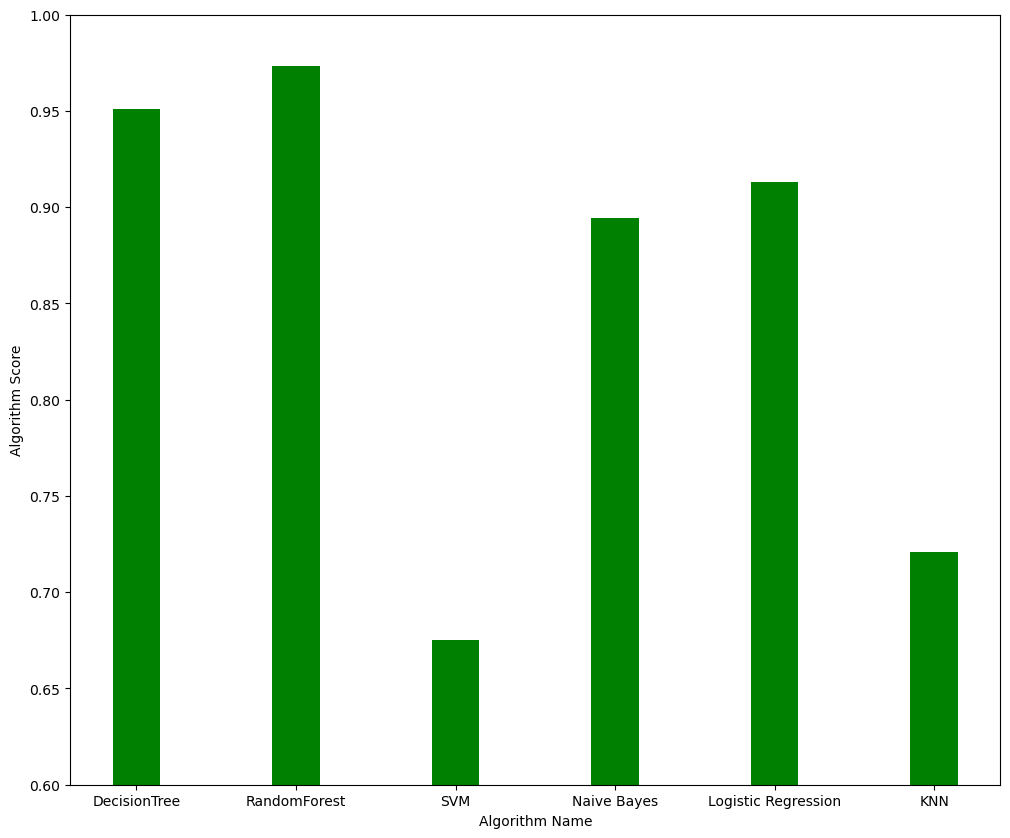

In [61]:
plt.figure(figsize=(12,10))
plt.ylim([0.60,1])
plt.bar(algo_names, algo_scores, width=0.3, color=['green'])
plt.xlabel("Algorithm Name")
plt.ylabel("Algorithm Score")

In [62]:
from sklearn.metrics import confusion_matrix

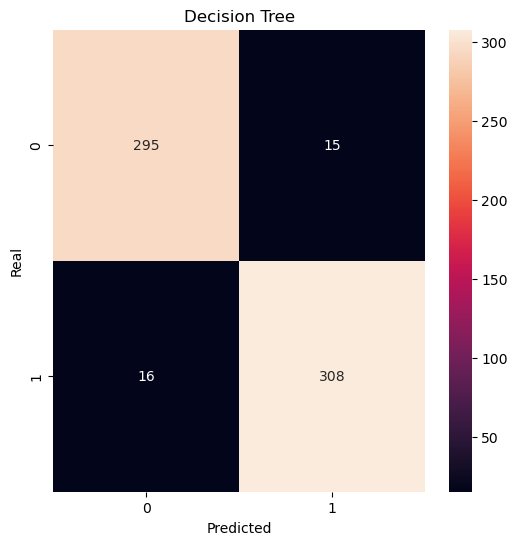

In [63]:
mat1= confusion_matrix(y_test, d1)
plt.figure(figsize=(6,6))
sns.heatmap(mat1, annot=True, fmt=".0f")
plt.ylabel("Real")
plt.xlabel("Predicted")
plt.title("Decision Tree")
plt.show()

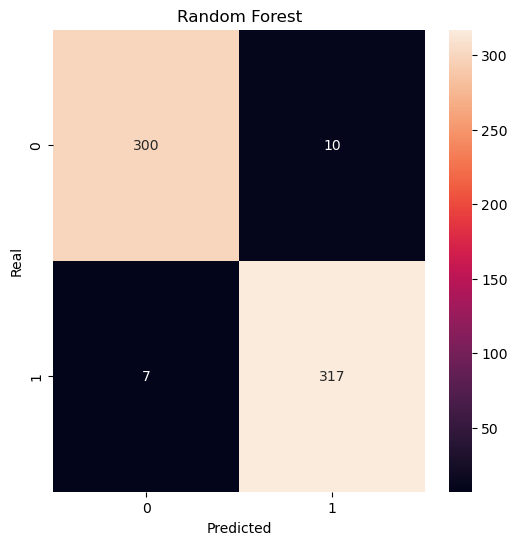

In [64]:
mat2= confusion_matrix(y_test, r1)
plt.figure(figsize=(6,6))
sns.heatmap(mat2, annot=True, fmt=".0f")
plt.ylabel("Real")
plt.xlabel("Predicted")
plt.title("Random Forest")
plt.show()

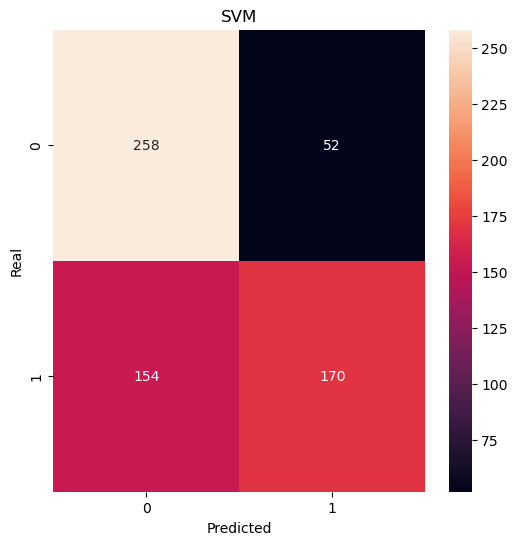

In [65]:
mat3= confusion_matrix(y_test, s1)
plt.figure(figsize=(6,6))
sns.heatmap(mat3, annot=True, fmt=".0f")
plt.ylabel("Real")
plt.xlabel("Predicted")
plt.title("SVM")
plt.show()

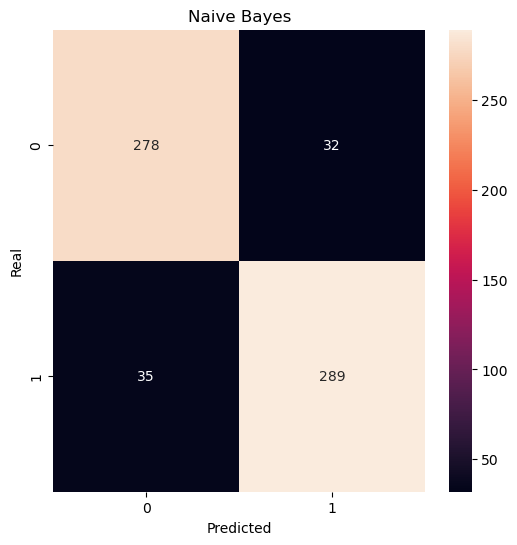

In [66]:
mat4= confusion_matrix(y_test, n1)
plt.figure(figsize=(6,6))
sns.heatmap(mat4, annot=True, fmt=".0f")
plt.ylabel("Real")
plt.xlabel("Predicted")
plt.title("Naive Bayes")
plt.show()

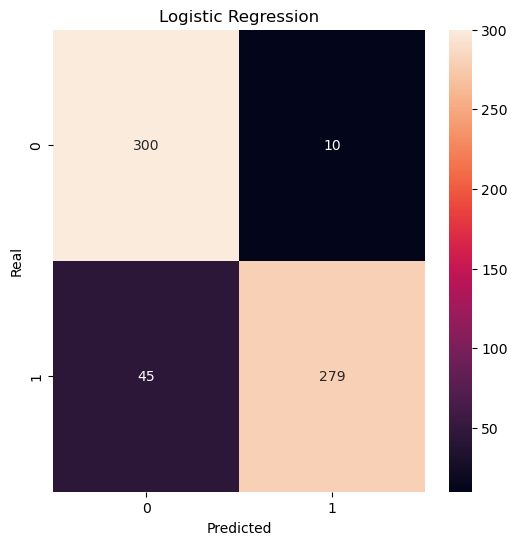

In [68]:
mat5= confusion_matrix(y_test, l1)
plt.figure(figsize=(6,6))
sns.heatmap(mat5, annot=True, fmt=".0f")
plt.ylabel("Real")
plt.xlabel("Predicted")
plt.title("Logistic Regression")
plt.show()

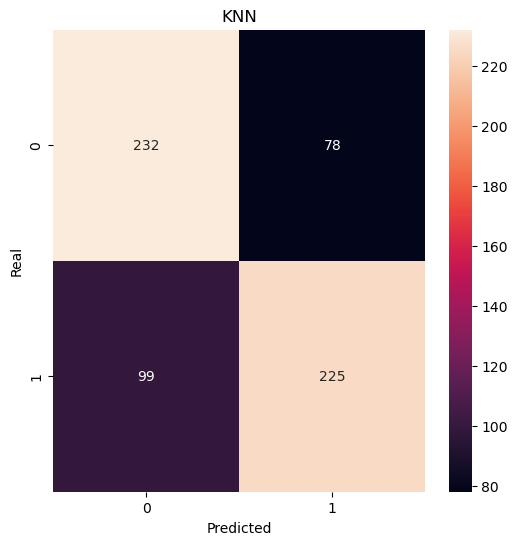

In [69]:
mat6= confusion_matrix(y_test, k1)
plt.figure(figsize=(6,6))
sns.heatmap(mat6, annot=True, fmt=".0f")
plt.ylabel("Real")
plt.xlabel("Predicted")
plt.title("KNN")
plt.show()

0.951115093588212


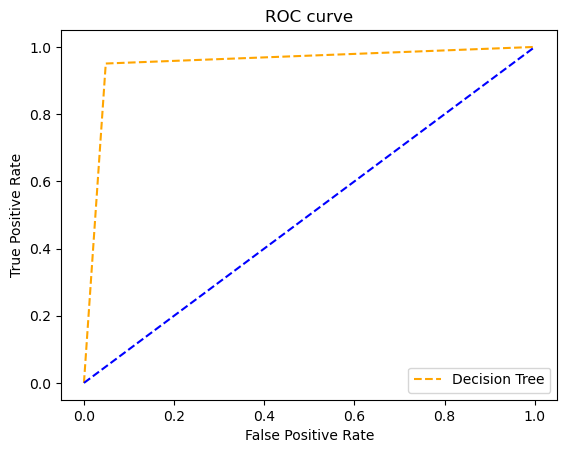

In [71]:
#ROC CURVE FOR DECISION TREE
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob1=d.predict_proba(X_test)
fpr1,tpr1,thresh1=roc_curve(y_test,pred_prob1[:,1],pos_label=1)
random_probs1=[0 for i in range(len(y_test))]
p_fpr1, p_tpr1,_= roc_curve(y_test, random_probs1, pos_label=1)
auc_score1=roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
plt.plot(fpr1,tpr1,linestyle='--',color='orange',label='Decision Tree')
plt.plot(p_fpr1,p_tpr1,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

0.9950766626841895


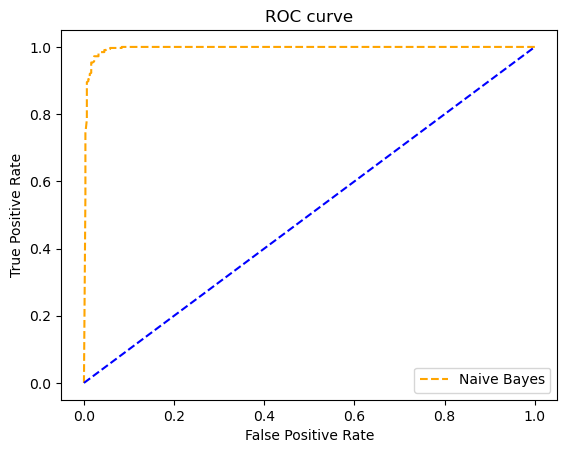

In [72]:
#ROC CURVE FOR RANDOM FOREST
pred_prob2=r.predict_proba(X_test)
fpr2,tpr2,thresh2=roc_curve(y_test,pred_prob2[:,1],pos_label=1)
random_probs2=[0 for i in range(len(y_test))]
p_fpr2, p_tpr2,_= roc_curve(y_test, random_probs2, pos_label=1)
auc_score2=roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score2)
plt.plot(fpr2,tpr2,linestyle='--',color='orange',label='Random Forest')
plt.plot(p_fpr2,p_tpr2,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

0.6784747112704103


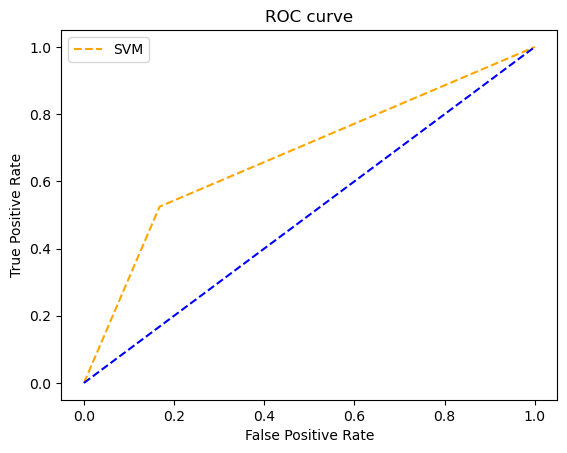

In [73]:
#ROC for SVM
fpr3,tpr3,thresh3=roc_curve(y_test,s1,pos_label=1)
random_probs3=[0 for i in range(len(y_test))]
p_fpr3, p_tpr3,_= roc_curve(y_test, random_probs3, pos_label=1)
auc_score3=roc_auc_score(y_test, s1)
print(auc_score3)
plt.plot(fpr3,tpr3,linestyle='--',color='orange',label='SVM')
plt.plot(p_fpr3,p_tpr3,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

0.9574273197929112


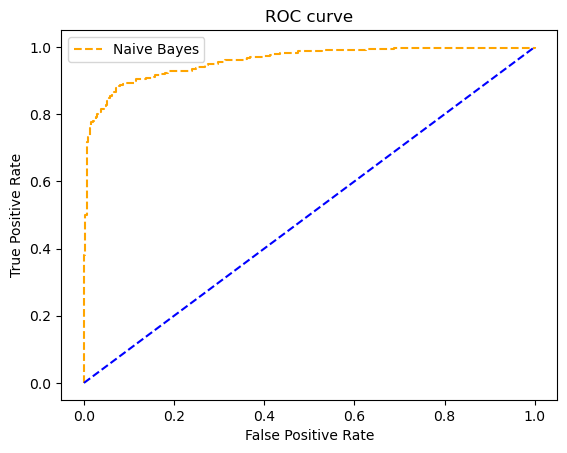

In [74]:
#ROC CURVE FOR NAIVE BAYES
pred_prob4=n.predict_proba(X_test)
fpr4,tpr4,thresh4=roc_curve(y_test,pred_prob4[:,1],pos_label=1)
random_probs4=[0 for i in range(len(y_test))]
p_fpr4, p_tpr4,_= roc_curve(y_test, random_probs4, pos_label=1)
auc_score4=roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score4)
plt.plot(fpr4,tpr4,linestyle='--',color='orange',label='Naive Bayes')
plt.plot(p_fpr4,p_tpr4,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

0.9480983671843888


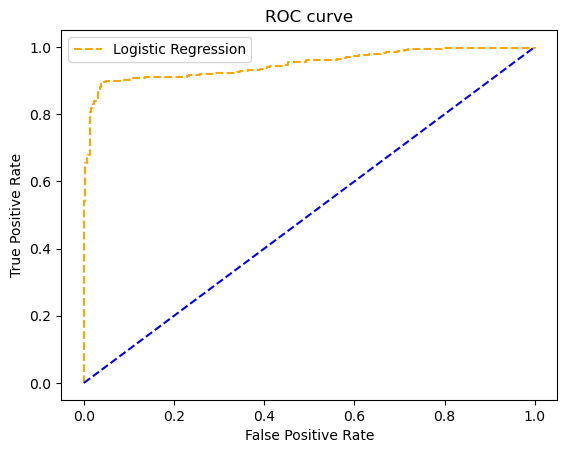

In [76]:
#ROC CURVE FOR LOGISTIC REGRESSION
pred_prob5=l.predict_proba(X_test)
fpr5,tpr5,thresh5=roc_curve(y_test,pred_prob5[:,1],pos_label=1)
random_probs5=[0 for i in range(len(y_test))]
p_fpr5, p_tpr5,_= roc_curve(y_test, random_probs5, pos_label=1)
auc_score5=roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score5)
plt.plot(fpr5,tpr5,linestyle='--',color='orange',label='Logistic Regression')
plt.plot(p_fpr5,p_tpr5,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

0.7896654719235364


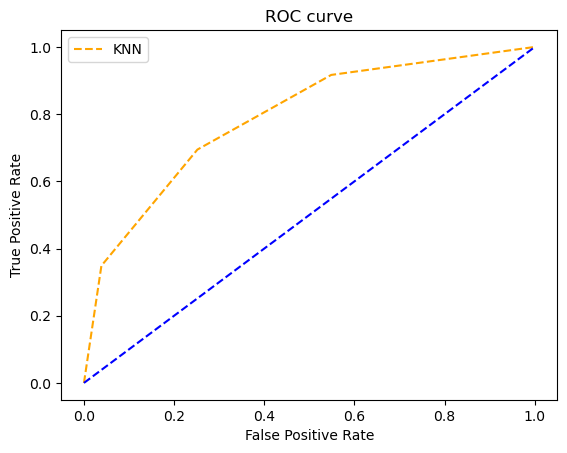

In [77]:
#ROC CURVE FOR LOGISTIC REGRESSION
pred_prob6=k.predict_proba(X_test)
fpr6,tpr6,thresh6=roc_curve(y_test,pred_prob6[:,1],pos_label=1)
random_probs6=[0 for i in range(len(y_test))]
p_fpr6, p_tpr6,_= roc_curve(y_test, random_probs6, pos_label=1)
auc_score6=roc_auc_score(y_test, pred_prob6[:,1])
print(auc_score6)
plt.plot(fpr6,tpr6,linestyle='--',color='orange',label='KNN')
plt.plot(p_fpr6,p_tpr6,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()